In [34]:
!pip install yfinance

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance

GetStockinfo = yfinance.Ticker("AAPL")
apple = GetStockinfo.history(period="10y")
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-12-19,11.711301,11.784177,11.650366,11.703340,235530400,0.0,0.0
2011-12-20,11.873281,12.128654,11.857971,12.124061,337215200,0.0,0.0
2011-12-21,12.146719,12.165398,12.003417,12.139371,262948000,0.0,0.0
2011-12-22,12.156209,12.221431,12.128651,12.203671,202358800,0.0,0.0
2011-12-23,12.238579,12.357998,12.232455,12.350037,269399200,0.0,0.0


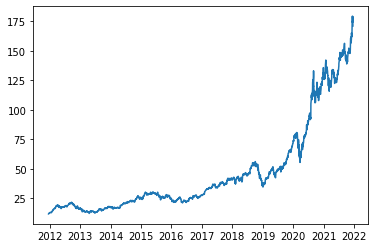

In [44]:
plt.plot(apple['Close'])

In [45]:
residuals = np.zeros(shape=(2516,1))
residual_percentage = np.zeros(shape=(2516,1))
for i in range(1,2516):
  residuals[i] = apple['Close'].iloc[i] - apple['Close'].iloc[i-1]
  residual_percentage[i] = residuals[i]/apple['Close'].iloc[i-1]


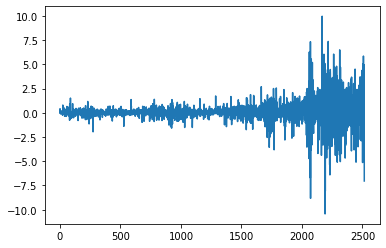

In [46]:
plt.plot(residuals)

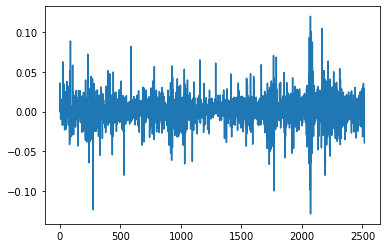

In [47]:
plt.plot(residual_percentage)

In [48]:
from scipy.stats import describe
describe(residual_percentage)

DescribeResult(nobs=2516, minmax=(array([-0.12864688]), array([0.11980817])), mean=array([0.00122921]), variance=array([0.00031922]), skewness=array([-0.12974623]), kurtosis=array([6.38334099]))

In [49]:
apple_abs_std_volatility = np.zeros(2506)
apple_abs_var_volatility = np.zeros(2506)
apple_perc_std_volatility = np.zeros(2506)
apple_perc_var_volatility = np.zeros(2506)

for i in range(2506):
  apple_abs_std_volatility[i] = np.std(apple['Close'].iloc[i:i+10])
  apple_abs_var_volatility[i] = np.var(apple['Close'].iloc[i:i+10])
  apple_perc_std_volatility[i] = np.std(residuals[i:i+10])
  apple_perc_var_volatility[i] = np.std(residual_percentage[i:i+10])

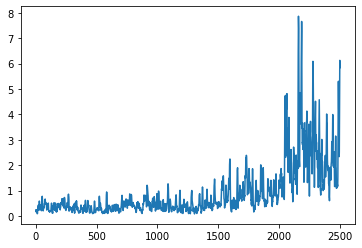

In [50]:
plt.plot(apple_abs_std_volatility)

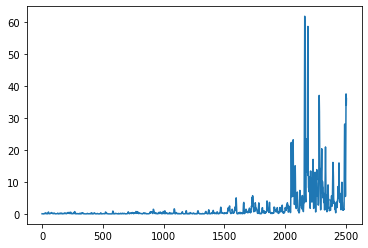

In [51]:
plt.plot(apple_abs_var_volatility)

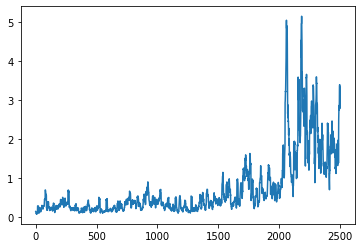

In [52]:
plt.plot(apple_perc_std_volatility)

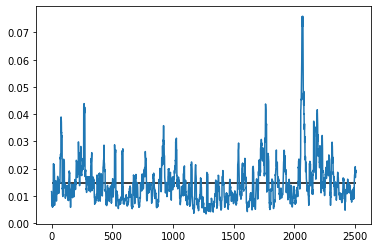

In [53]:
plt.plot(apple_perc_var_volatility)
plt.hlines(apple_perc_var_volatility.mean(),xmin=0,xmax=2506)